In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [29]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [31]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [32]:
dataset.loc[:122,"Region"]=1
dataset.loc[122:,"Region"]=0
dataset['Region'] = dataset['Region'].astype(int)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [33]:
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [34]:
dataset = dataset.dropna().reset_index(drop=True)
dataset = dataset.drop(122).reset_index(drop=True)

In [35]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [36]:
dataset.columns = dataset.columns.str.strip()
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [37]:
dataset[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = dataset[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
dataset[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = dataset[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [38]:
df = dataset

In [39]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [40]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [41]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [42]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [43]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [44]:
X = df.drop('FWI',axis=1)
y = df['FWI']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=10)

<Axes: >

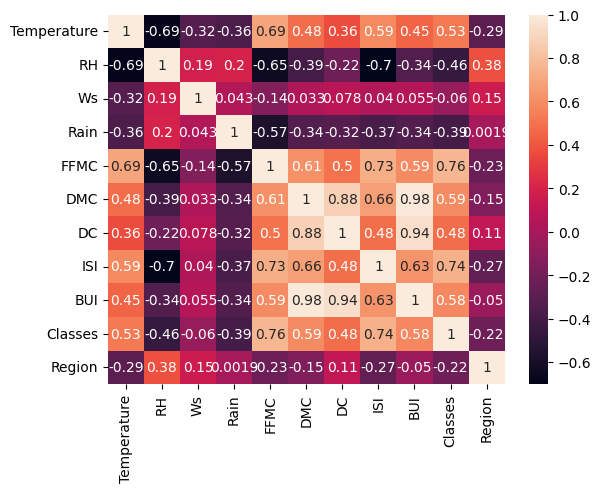

In [45]:
sns.heatmap(X_train.corr(),annot=True)

In [46]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [47]:
corr_features = correlation(X_train,0.85)

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [49]:
X_train_sc,X_test_sc

(array([[-0.301121  ,  0.06835876,  0.89673457, ...,  0.48086219,
          0.90566259,  1.01242284],
        [-1.98324518,  0.99672801, -0.58185068, ..., -1.07139989,
         -1.10416397,  1.01242284],
        [-0.301121  ,  0.53254338,  0.52708826, ...,  0.5286241 ,
          0.90566259, -0.9877296 ],
        ...,
        [ 0.25958707, -2.45150064, -0.95149699, ...,  2.27193383,
          0.90566259, -0.9877296 ],
        [-0.58147503,  0.06835876, -0.58185068, ..., -0.59378078,
         -1.10416397, -0.9877296 ],
        [-1.14218309,  1.0630401 , -1.3211433 , ..., -0.80870938,
         -1.10416397,  1.01242284]], shape=(162, 9)),
 array([[-8.61829059e-01,  4.66231295e-01, -5.81850675e-01,
         -4.24064583e-01,  3.74594357e-01, -4.06694465e-01,
         -3.54971234e-01,  9.05662586e-01,  1.01242284e+00],
        [-8.61829059e-01, -9.26322582e-01,  1.26638088e+00,
         -4.24064583e-01,  7.58044470e-01, -2.28559462e-01,
          1.05400512e+00,  9.05662586e-01, -9.87729597e-

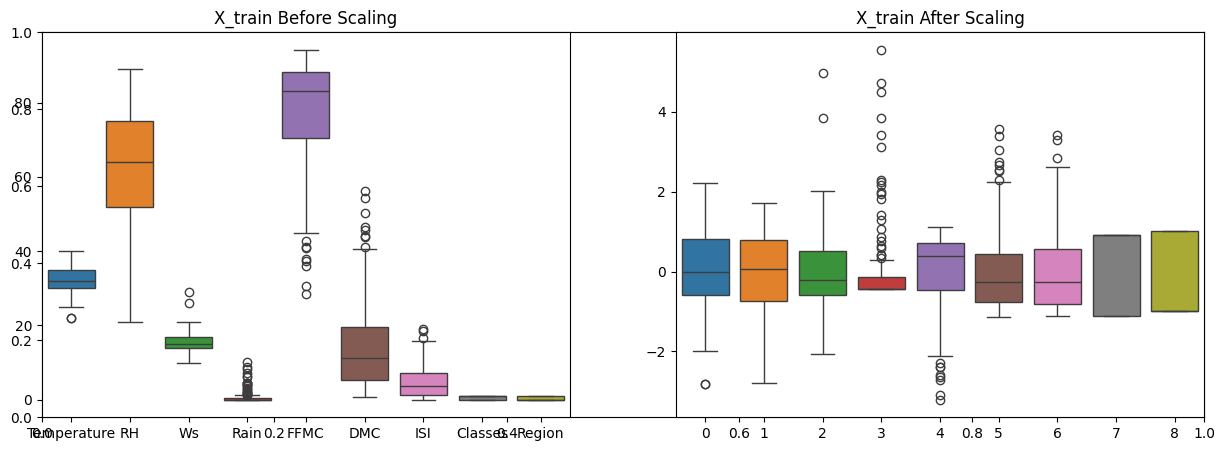

In [50]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_sc)
plt.title('X_train After Scaling')
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### Linear Regression

Mean absolute error:  0.6562931843633071
R2:  0.9870831620084868


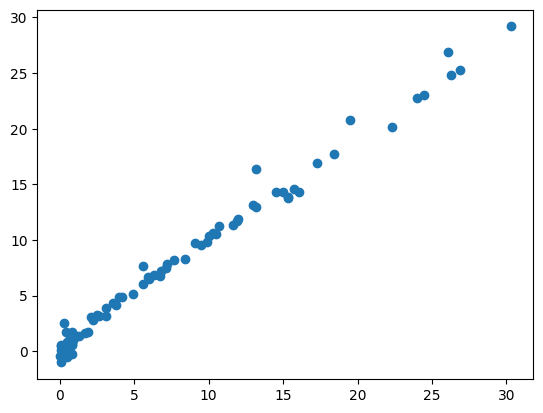

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_sc,y_train)
y_pred = lr.predict(X_test_sc)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2: ',score)
plt.scatter(y_test,y_pred)

### Ridge Regression

Mean absolute error:  0.6781225131218197
R2:  0.9863698710809672


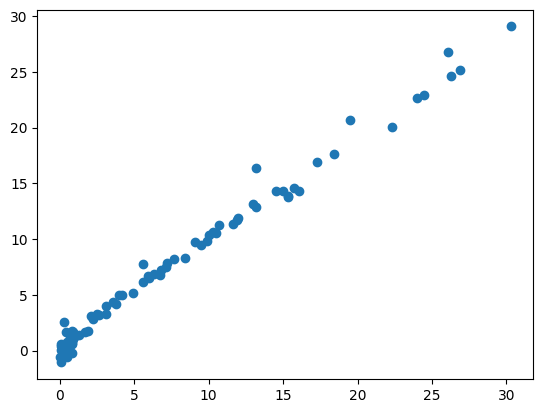

In [53]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_sc,y_train)
y_pred = ridge.predict(X_test_sc)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2: ',score)
plt.scatter(y_test,y_pred)

Mean absolute error:  0.6781225131218982
R2:  0.9863698710809582


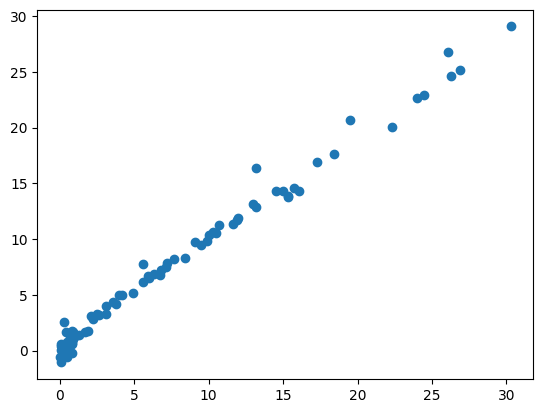

In [54]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV()
ridgecv.fit(X_train_sc,y_train)
y_pred = ridgecv.predict(X_test_sc)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2: ',score)
plt.scatter(y_test,y_pred)

### Lasso Regression

Mean absolute error:  1.3199947825749143
R2:  0.9489776696889856


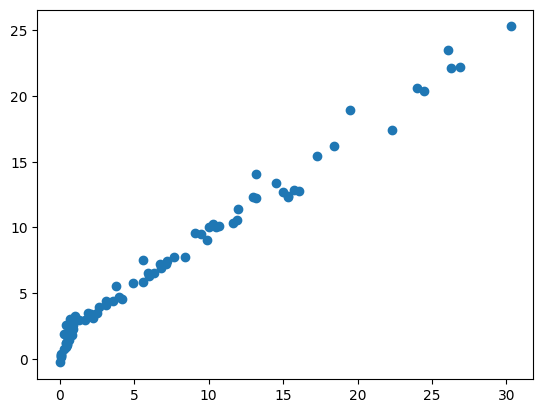

In [55]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_sc,y_train)
y_pred = lasso.predict(X_test_sc)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2: ',score)
plt.scatter(y_test,y_pred)

Mean absolute error:  0.6564807091902248
R2:  0.98699063233565


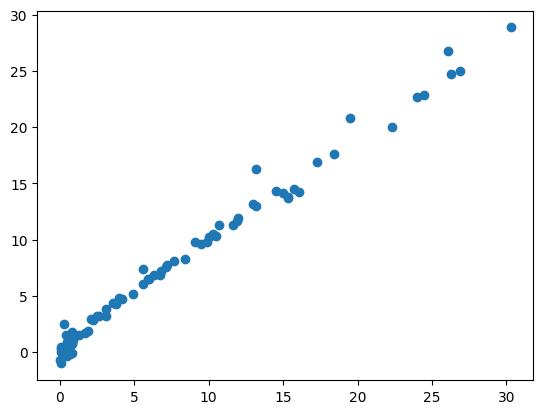

In [56]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(X_train_sc,y_train)
y_pred = lassocv.predict(X_test_sc)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2: ',score)
plt.scatter(y_test,y_pred)

### ElasticNet Regression

Mean absolute error:  2.02562054995965
R2:  0.8818928076695921


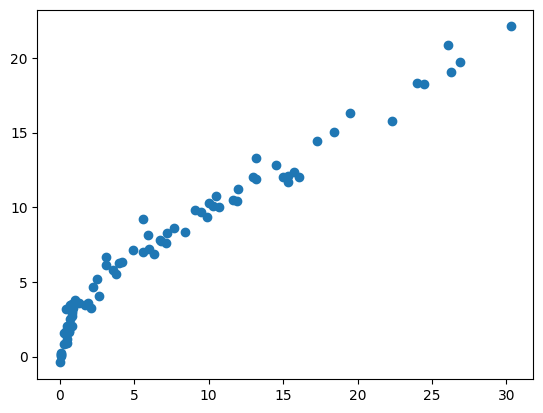

In [57]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train_sc,y_train)
y_pred = en.predict(X_test_sc)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2: ',score)
plt.scatter(y_test,y_pred)

Mean absolute error:  0.7013189950718118
R2:  0.9854835731487825


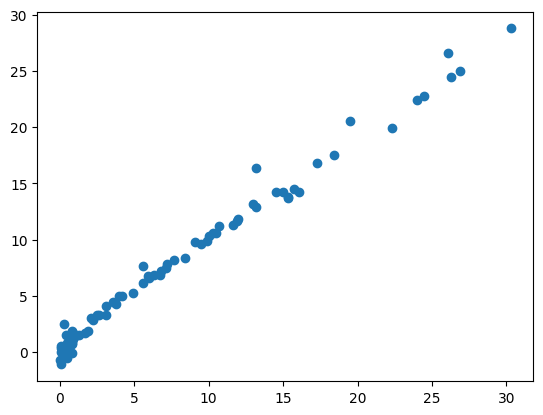

In [58]:
from sklearn.linear_model import ElasticNetCV
encv = ElasticNetCV()
encv.fit(X_train_sc,y_train)
y_pred = encv.predict(X_test_sc)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2: ',score)
plt.scatter(y_test,y_pred)